# Chem 30324, Spring 2019, Homework 5
Due Febrary 25, 2019

## Real-world particle-in-a-box.
### A one-dimensional particle-in-a-box is a simple but plausible model for the π electrons of a conjugated alkene, like butadiene ($C_4H_6$, shown here). Suppose all the C–C bonds in a polyene are 1.4 Å long and the polyenes are perfectly linear.

<img src="imgs/HW5-1.png"  width="360">

### 1. Plot out the energies of the $n = 1 – 6$ particle-in-a-box states for ethylene (2 carbon chain), butadiene (4 carbon chain), hexatriene (6 carbon chain), octatetraene (8 carbon chain), and decapentaene (10 carbon chain). What happens to the spacing between energy levels as the molecule gets longer? As $n$ gets larger?

For particle in a box, energy $E_n = \frac{n^2\pi^2\hbar^2}{2m_eL^2}$, where n = 1, 2, ...
As length of molecules increases, spacing between energy levels decreases. However, as energy level (n) increases, their spacing increases, as shown in plot below.

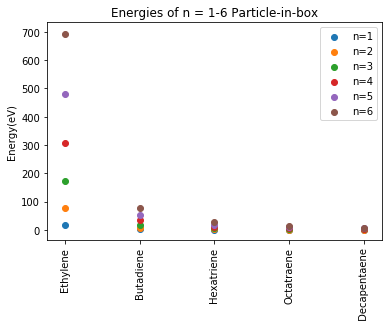

In [2]:
import numpy as np
import matplotlib.pyplot as plt

E=[] # energy array
l = 1.4e-10 # m, single C-C bond
hbar = 1.05457e-34 # J*s
m = 9.109e-31 # kg
N = [1,3,5,7,9] # Let N be the number of C-C bond, e.g. ethylene=1*l, butadiene=3*l, hexatriene=5*l, octatraene=7*l, decapentaene=9*l

# Get array
for n in range (1,7): # loop between energy levels 1 to 6+1 (+1 as in python syntax)
    for i in N: # loop between molecules e, b, h, o, d
        e = (n**2*np.pi**2*hbar**2*6.2415e18)/(2*m*(i*l)**2) # eV
        E.append(e) # E contains n=1 energies in e, b, h, o, d, followed by n=2 energies etc...

# Plot
plt.scatter(N,E[0:5],label="n=1",)  # 1st energy level in ethylene, butadiene, ... 
plt.scatter(N,E[5:10],label="n=2")  # 2nd energy level in ethylene, butadiene, ... 
plt.scatter(N,E[10:15],label="n=3") # 3rd energy level in ethylene, butadiene, ... 
plt.scatter(N,E[15:20],label="n=4") # 4th energy level in ethylene, butadiene, ... 
plt.scatter(N,E[20:25],label="n=5") # 5th energy level in ethylene, butadiene, ... 
plt.scatter(N,E[25:30],label="n=6") # 6th energy level in ethylene, butadiene, ... 

# Miscellaneous
plt.xticks(N, ["Ethylene","Butadiene","Hexatriene","Octatraene"," Decapentaene"], rotation='vertical')
plt.ylabel('Energy(eV)')
plt.title('Energies of n = 1-6 Particle-in-box')
plt.legend()
plt.show()

### 2. Plot out the normalized $n = 2$ particle-in-a-box wavefunction for an electron in butadiene and the normalized $n = 2$ probability distribution. Indicate on the plots the most probable location(s) of the electron, the average location of the electron, and the positions of any nodes.

The wavefunction of particle in a box is: $$\Psi_n(x)= \sqrt{\frac{2}{L}}sin(\frac{n\pi x}{L}), 0<x<L$$
The probability distribution of particle in a box is $\Psi_n^2(x)$:$$\Psi_n^2(x) = \frac{2}{L}sin^2(\frac{n\pi x}{L}), 0<x<L$$

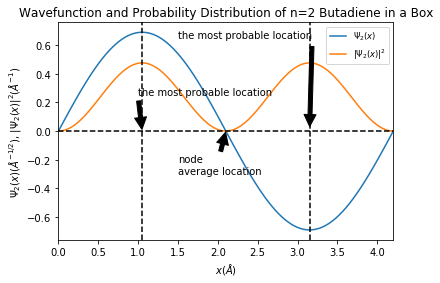

In [3]:
import numpy as np
import matplotlib.pyplot as plt

l = 1.4*3 # angstrom, length of butadiene is 3 times 1.4 angstrom
x = np.linspace(0,l,100) # let x range from 0 to 4.2 A
psi = (2/l)**0.5*np.sin(2*np.pi*x/l) # define normalized wavefunction
p1, = plt.plot(x,psi,label='$\Psi_2(x)$') # wavefunction = psi
p2, = plt.plot(x,psi**2,label='$|\Psi_2(x)|^2$') # probability = psi^2

plt.xlim(0,l) # make x-axis range from 0 to 4.2A
plt.xlabel('$x(\AA)$') # x in angstrom
plt.ylabel('$\Psi_2(x)(\AA^{-1/2})$, $|\Psi_2(x)|^2(\AA^{-1})$') # y in angstrom^-0.5 and angstrom^-1
plt.title('Wavefunction and Probability Distribution of n=2 Butadiene in a Box')

# You can ignore these annotations and write on your printout
plt.legend(fontsize = 'small') # let every letter be small
plt.axhline(y=0,color='k',linestyle='--') # horizontal line at y=0
plt.axvline(x=l/4,color='k',linestyle='--') # vertical line at x=l/4
plt.axvline(x=3*l/4,color='k',linestyle='--') # vertical line at x=3l/4
plt.annotate('the most probable location', xy=(l/4, 0), xytext=(1.0, 0.25), arrowprops=dict(facecolor='black', shrink=0.05)) # add annotations
plt.annotate('the most probable location', xy=(3*l/4, 0), xytext=(1.5, 0.65), arrowprops=dict(facecolor='black', shrink=0.05)) # add annotations
plt.annotate('node\naverage location', xy=(l/2, 0), xytext=(1.5, -0.3), arrowprops=dict(facecolor='black', shrink=0.05)) # add annotations
plt.show()

### 3. Butadiene has 4 π electrons, and we will learn later that in its lowest energy state, two of these are in the $n = 1$ and two in the $n = 2$ levels. Compare the wavelength of light (in nm) necessary to excite one electron from either of these levels to the empty $n = 3$ level.

In [4]:
import numpy as np

l = 3*1.4e-10 # m, length of the box (DO NOT MIX UP WITH ATOMIC BOND LENGTH)
hbar = 1.05457e-34 # J*s
me = 9.109e-31 # kg
E13 = (8*np.pi**2*hbar**2/2/me/l**2)*6.2415e18 # energy difference between n=1&3, 3^2-1^2=8
E23 = (5*np.pi**2*hbar**2/2/me/l**2)*6.2415e18 # energy difference between n=2&3, 3^2-2^2=5

# E = hc/lambda where hc=1240ev*nm
lamda1_3 = 1240/E13 # nm
lamda2_3 = 1240/E23 # nm
print('From n=1 to n=3, light must have wavelength = {0:.2f}nm. \nFrom n=2 to n=3, light must have wavelength = {1:.2f}nm.'.format(lamda1_3,lamda2_3))

From n=1 to n=3, light must have wavelength = 72.71nm. 
From n=2 to n=3, light must have wavelength = 116.34nm.


### 4. We’ll learn later that the probability of an electron jumping between two energy states by emitting or absorbing light is proportional to the square of the “transition dipole,” given by the integral $\lvert\langle\psi_{initial}\lvert \hat{x}\rvert\psi_{final}\rangle\rvert^2$. Contrast the relative probabilities of an electron jumping from $n = 1$ to $n = 3$ and from $n = 2$ to $n = 3$ levels. Can you propose any general rules about “allowed” and "forbidden" jumps?

$$\int_{0}^{L}\Psi_{1}x\Psi_{3} = \frac{2}{L}\int_{0}^{L}{sin(\frac{\pi x}{L})}*x*sin(\frac{3\pi x}{L}) = 2\int_{0}^{1}{sin(\pi x)}*x*sin(3\pi x),\quad L=1m$$ 
$$\lvert\langle\psi_{1}\lvert \hat{x}\rvert\psi_{3}\rangle\rvert^2 = [2\int_{0}^{1}{sin(\pi x)}*x*sin(3\pi x)]^2$$
$$\int_{0}^{L}\Psi_{2}x\Psi_{3} = \frac{2}{L}\int_{0}^{L}{sin(\frac{2\pi x}{L})}*x*sin(\frac{3\pi x}{L}) = 2\int_{0}^{1}{sin(2\pi x)}*x*sin(3\pi x),\quad L=1m$$ 
$$\lvert\langle\psi_{2}\lvert \hat{x}\rvert\psi_{3}\rangle\rvert^2 = [2\int_{0}^{1}{sin(2\pi x)}*x*sin(3\pi x)]^2$$

In [6]:
from sympy import * # import sympy for symbolic mathematics
x = symbols('x') # avoid python error
a = 2*integrate((sin(pi*x)*x*sin(3*pi*x)),(x,0,1)) 
print("Probability = %f (zero)"%(a**2))
b = 2*integrate((sin(2*pi*x)*x*sin(3*pi*x)),(x,0,1))
print("Probability = %s = %f (non-zero)"%(b**2, 2304/(625*np.pi**4)))

Probability = 0.000000 (zero)
Probability = 2304/(625*pi**4) = 0.037845 (non-zero)


Jumps from n = 1 to n = 3 is forbidden because P = 0. Jumps from n = 2 to n = 3 is allowed because P > 0. 

Generally, if $n_{final}-n_{initial}$ = even number, the jump is forbidden; If $n_{final}-n_{initial}$ = odd number, the jump is allowed.

### 5. Consider the reaction of two ethylene molecules to form butadiene:
<img src="imgs/HW5-2.png"  width="360">

### As a very simple estimate, you could take the energy of each molecule as the sum of the energies of its π electrons, allowing only two electrons per energy level. Again taking each C—C bond as 1.4 Å long and treating the π electrons as particles in a box, calculate the total energy of an ethylene and a butadiene molecule within this model (in kJ/mol), and from these calculate the net reaction energy. Compare your results to the experimental reaction enthalpy. How well did the model do?

In [7]:
import numpy as np
# From NIST website
ethylene = 52.4 # kJ/mol
butadiene = 108.8 # kJ/mol
print('E_rxn_data = %i kJ/mol from NIST website.'%(butadiene - 2*ethylene))

l = 1.4e-10 # m, length of ethylene
hbar = 1.05457e-34 # J*s
me = 9.109e-31 # kg
# Two ethylene (1L) has 4 n1 electrons (4*1**2=4), butadiene (3L) has 2 n1 + 2 n2 electrons (2*(1**2+2**2)=10)
E_rxn = 10*(np.pi**2*hbar**2)/(2*me*(3*l)**2)-4*(np.pi**2*hbar**2)/(2*me*l**2) # J
print('E_rxn = %f kJ/mol (fails badly)\n'%(E_rxn*6.022e23 /1000))
print('Particle in a box model isn\'t perfect because: \n1. potential isn\'t either zero or infinite in real life \n2. model ignores interaction between nucleus and electrons.')

E_rxn_data = 4 kJ/mol from NIST website.
E_rxn = -5347.679747 kJ/mol (fails badly)

Particle in a box model isn't perfect because: 
1. potential isn't either zero or infinite in real life 
2. model ignores interaction between nucleus and electrons.


### 6. This particle-in-a-box model has many flaws, not the least of which is that the ends of the polyene “box” are not infinitely high potential walls. In a somewhat better model the π electrons would travel in a finite-depth potential well. State two things that would change from the infinite depth to the finite depth model.

When wall potential drops from infinity to finite value, 
1. Number of bound states/levels will drop from infinite to finite.
   (Molecules will eventually escape the box at high enough energy)
3. Possible for molecules to tunnel into once forbidden region.

## Really large box with a particle.
### A gas molecule rattling around in a bottle can be described as a particle in a 3-dimensional box. Consider ethylene gas in a cubic “bottle” 1 m on a side.

### 7. What is the particle-in-a-box “zero point energy” of one of these ethylene molecules, in kJ/mol? Is this energy of chemical significance?

No chemical significance. $$E_{3D} = E_{n_x,n_y,n_z} = \frac{(n_x^2+n_y^2+n_z^2)\pi^2\hbar^2}{2mL^2}, \quad where\quad n_x = 1, 2, 3... \quad n_y = 1, 2, 3...\quad n_z = 1, 2, 3...$$

In [8]:
import numpy as np
l = 1 # m, length of the box
hbar = 1.05457e-34 # J*s
m = 28.053*1.6605e-27 # kg, mass of a ethylene

# Energy is lowest when nx=ny=nz=1
# n^2 = nx^2+ny^2+nz^2 = 3
E_111 = (3*np.pi**2*hbar**2)/(2*m*l**2) # J
print('Zero point energy = E_111 = %E kJ/mol.'%(E_111*6.022e23 /1000))

Zero point energy = E_111 = 2.128455E-21 kJ/mol.


### 8. According to the kinetic theory of gases, what is the average kinetic energy of an ethylene molecule at 298 K? What is the approximate value of $n = \sqrt{n_x^2 + n_y^2 + n_z^2}$ of a gas molecule molecule with this energy at 298 K?

In equipartition theory or kinetic theory of gas, average kinetic energy of an ethylene: $E = \frac{3}{2}k_BT$.

In [9]:
k = 1.38065e-23 # J/K
T = 298 # K
KE = 3/2*k*T #J

# 3/2kT = n**2*pi**2*hbar**2/(2*m*l**2) where l = 1L for ethylene
q = (np.pi**2*hbar**2)/(2*m*l**2) # Quantum energy term without quantum number n
n_square = KE/q        # n^2
n = np.sqrt(n_square)  # n
print('KE_avg of ethylene @ 298 K  = %E J while n = %f (approximation,not an exact integer).'%(KE,n))

KE_avg of ethylene @ 298 K  = 6.171506E-21 J while n = 72375965221.277634 (approximation,not an exact integer).


### 9. What is the energy difference between the $n$ and $n + 1$ levels (in kJ/mol)? Is it possible to determine the exact value of $n$ for a particular molecule?

In [16]:
# (n+1)^2-n^2 = 2n+1
dE = (2*n+1)*np.pi**2*hbar**2/(2*m*l**2) # energy difference
print('Delta_E = %E kJ/mol from n to n+1 \n'%(dE*6.022e23/1000))
print('Energy difference is too small, hence energy levels are regarded as continuous, which means it\'s not possible to determine the exact integer value of n for a particular molecule (as shown in problem 8).')

Delta_E = 1.026993E-10 kJ/mol from n to n+1 

Energy difference is too small, hence energy levels are regarded as continuous, which means it's not possible to determine the exact integer value of n for a particular molecule (as shown in problem 8).


## Quantum mechanics of vibrating NO.
### The diatomic nitric oxide (NO) is an unusual and important molecule. It has an odd number of electrons, which is a rarity for stable molecule. It acts as a signaling molecule in the body, helping to regulate blood pressure, is a primary pollutant from combustion, and is a key constituent of smog. It exists in several isotopic forms, but the most common, ${}^{14}$N= ${}^{16}$O, has a bond length of 1.15077 Å and harmonic vibrational frequency of 1904 cm$^{-1}$.

### 10. The ground vibrational wavefunction of N=O can be written 

$$\Psi_{\upsilon=0}(x) = \left ({\frac{1}{\alpha\sqrt{\pi}}}\right )^{1/2}e^{-x^2/2\alpha^2}, \quad x = R-R_{eq}, \quad \alpha = \left ({\frac{\hbar^2}{\mu k}}\right )^{1/4}$$

### where $x = R-R_{eq}$. Calculate $\langle x\rangle$ and $\langle x^2\rangle$ for NO in the $\Psi_{\upsilon=0}(x)$ state (you might want to use $\alpha$ as a length unit).

$$\langle x \rangle = \langle\Psi_{\upsilon=0}(x)|x|\Psi_{\upsilon=0}(x)\rangle=\int^{+\infty}_{-\infty}\frac{1}{\alpha\sqrt{\pi}} x e^{-\frac{x^2}{\alpha^2}}dx$$

In [11]:
# You can also solve this part by discussing whether the function is even or odd. 
from sympy import *
import numpy as np
x = symbols("x")
a = symbols("a",positive=True)
x1 = integrate((1/a/np.pi**0.5*x*exp(-x**2/a**2)),(x,-oo,+oo))
print('<x>=',x1)

<x>= 0


$$\langle x^2 \rangle = \langle\Psi_{\upsilon=0}(x)|x^2|\Psi_{\upsilon=0}(x)\rangle=\int^{+\infty}_{-\infty}\frac{1}{\alpha\sqrt{\pi}} x^2 e^{-\frac{x^2}{\alpha^2}}dx $$

In [12]:
x2 = integrate((1/a/np.pi**0.5*x**2*exp(-x**2/a**2)),(x,-oo,+oo))
print('<x^2>=',x2)

<x^2>= 0.282094791773878*sqrt(pi)*a**2


In fact, the answer is $\langle x^2 \rangle=\frac{a^2}{2}$.

### 11. Calculate the average potential energy, $\langle V(x)\rangle$, in the ground state, in units of hν. Hint: This is trivial to calculate given the answer to question 10!

$$\langle V(x)\rangle=\frac{1}{2}k\langle x^2\rangle=\frac{k\alpha^2}{4}=\frac{k}{4}\cdot((\frac{\hbar^2}{\mu k})^\frac{1}{4})^2=\frac{\hbar}{4}\sqrt{\frac{k}{\mu}}$$

$$\because \nu=\frac{1}{2\pi} \sqrt{\frac{k}{\mu}}$$

$$\therefore\langle V(x)\rangle=\frac{h\nu}{4}$$

### 12. Using conservation of energy and your answer to question 11, calculate the average kinetic energy, $\langle T(x)\rangle$, in the ground state, in units of $h\nu$. Comment on the relationship between the kinetic and potential energies. This is a general result for all $\nu$, and is a consequence of the [virial theorem](https://en.wikipedia.org/wiki/Virial_theorem) for the harmonic potential.

$$E(x)=\langle V(x)\rangle+\langle T(x)\rangle$$
Because in ground state, $E(x)=\frac{h\nu}{2}$. And by $\langle V(x)\rangle=\frac{h\nu}{4}$, we can get $\langle T(x)\rangle =E(x)-\langle V(x)\rangle=\frac{h\nu}{4}=\langle V(x)\rangle$. This is also ture for classical harmonic oscillator.

### 13. Calculate the classical minimum and maximum values of the $^{14}$N=$^{16}$O bond length for a molecule in the ground vibrational state. Hint: Calculate the classical limits on x, the value of x at which the kinetic energy is 0 and thus the total energy equals the potential energy.

When kinetic energy is zero, $\langle V(x)\rangle=E(x)$, which equals $\frac{1}{2}kx^2=\frac{1}{2}h\nu$. From question 2, $\langle V(x)\rangle=\frac{k\alpha^2}{4}=\frac{h\nu}{4}$, thus $k\alpha^2=h\nu$. So $\frac{1}{2}kx^2=\frac{1}{2}k\alpha^2$,$x=\alpha$ or $x=-\alpha$.

We can get $\alpha$ by $\tilde{\nu}=1904 cm^{-1}$, $\nu=c\tilde{\nu}$ and $\nu=\frac{1}{2\pi}\sqrt{\frac{k}{\mu}}$.

In [17]:
import numpy as np

nutilde = 190400  # m^-1
c = 299792458  # m/s, speed of light
N = 14.003  # amu
O = 15.995  # amu
hbar = 1.05457*10**-34  # J*s

nu = c*nutilde  # s^-1, frequency
mu = 1/(1/N+1/O)*1.6605*10**-27  # kg, reduced mass
k = (2*np.pi*nu)**2*mu  # N/m, force constant
alpha = (hbar**2/mu/k)**0.25  # m
print('alpha=',alpha,'m.')

alpha= 4.86998913622163e-12 m.


$R_{max}=R_{eq}+\alpha,R_{min}=R_{eq}-\alpha$

In [31]:
req = 1.15077*10**-10 # m, bond length
rmax = req + alpha # m
rmin = req + alpha # m
print("Classical bond length maximum is %e m, classical cond length minimum is %e m."%(rmax,rmin))

Classical bond length maximum is 1.199470e-10 m, classical cond length minimum is 1.199470e-10 m.


### 14. Calculate the probability for a quantum mechanical ${}^{14}N= {}^{16}O$ molecule to have a bond length outside the classical limits. This is an example of quantum mechanical tunneling.

$$P_{inside-limit}=int^{\alpha}{-\alpha}\Psi^2_{\nu=0}(x)dx=\int^{\alpha}_{-\alpha}\frac{1}{\alpha\sqrt{\pi}}e^{-\frac{x^2}{\alpha^2}}dx$$

In [35]:
pi = integrate(1/a/sqrt(pi)*exp(-x**2/a**2),(x,-a,a))
pprint(p)

erf(1)


In [40]:
import math
po = 1-math.erf(1)
print("Probalbility for outside classical limits is %f."%po)

Probalbility for outside classical limits is 0.157299.


## Statistical mechanics of vibrating NO

### 15. Using your knowledge of the harmonic oscillator and the Boltzmann distribution, complete the table below for the first four harmonic vibrational states of $^{14}$N=$^{16}$O.

|Quantum number|Energy (kJ/mol)| Relative population at 400 K| Relative population at 410 K |
|--------------|---------------|-----------------------------|----------|
| $v=0$ |11.38818|1|1|
| $v=1$ |34.16455|1.061140$\times10^{-3}$|1.254050$\times10^{-3}$| 
| $v=2$ |56.94091|1.126018$\times10^{-6}$|1.572641$\times10^{-3}$|
| $v=3$ |79.71728|1.194862$\times10^{-9}$|1.972170$\times10^{-3}$|

In [49]:
h = 6.62607*10**-34  # J*s
wavenumber = 190400  # m^-1
c = 299792458  # m/s
nu = c*wavenumber  # frequency, s^-1
N = 6.022*10**23
R = 8.31447  # J*mol^-1*K^-1
t0 = 400  # K
t1 = 410  # K
E,p0,p1 = [],[],[]

for n in [0,1,2,3]:
    E.append((n+0.5)*h*nu*N)  # J*mol^-1, energy
    p0.append(exp(-E[n]/R/t0)/exp(-E[0]/R/t0))  # Relative population at 400K.
    p1.append(exp(-E[n]/R/t1)/exp(-E[0]/R/t1))  # Relative population at 410K.
    print("Energy of v=%i is %e J, relative population at 400K is %e, at 410K is %e."%(n,E[n],p1[n],p2[n]))

Energy of v=0 is 1.138818e+04 J, relative population at 400K is 1.000000e+00, at 410K is 1.000000e+00.
Energy of v=1 is 3.416455e+04 J, relative population at 400K is 1.254050e-03, at 410K is 1.254050e-03.
Energy of v=2 is 5.694091e+04 J, relative population at 400K is 1.572641e-06, at 410K is 1.572641e-06.
Energy of v=3 is 7.971728e+04 J, relative population at 400K is 1.972170e-09, at 410K is 1.972170e-09.


### 16. Use the table to estimate the average vibrational energy of a mole of $^{14}$N=$^{16}$O at 400 and 410 K.

In [52]:
p0_total = 0
p1_total = 0
E0 = 0
E1 = 0
for n in [0,1,2,3]:
    p0_total += p0[n]  # Add all probabilities at 400K together. 
    p1_total += p1[n]  # Add all probabilities at 410K together. 
    E0 += E[n]*p0[n]/p0_total  # Calculate weighted average energy at 400K. 
    E1 += E[n]*p1[n]/p1_total  # Calculate weighted average energy at 410K. 
print("Average vibrational energy of NO at 400K is %f J, at 410K is %f J."%(E0,E1))

Average vibrational energy of NO at 400K is 11424.461678 J, at 410K is 11431.062573 J.


### 17. Use your answer to Question 16 to estimate the vibrational heat capacity ($dE/dT$) of a mole of $^{14}$N=$^{16}$O in this temperature range. How does your answer compare to the classical estimate, $R=8.314$ J/mol K?

In [54]:
print("The vibrational heat capacity in this temperature range is %f J/(mol*K)."%((E1-E0)/(410-400)))

The vibrational heat capacity in this temperature range is 0.660089 J/(mol*K).


The classical estimate is not right, because in classical esitmate the energy is continuous. If the temperature goes higher, energy levels will be closer to continuous, then the heat capacity will be close to R. 